# Mark's Daily Notebook Test

## Goals
I'm testing the idea of using one of these notebooks instead of mathematica.
## Summary
Does it work? YES!

In [ ]:
#Globals 
date = "160807"
directory = "//Andor/share/Data and documents/Data repository/" + date + "/"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
%matplotlib inline

In [25]:
# Fits 
def quadratic(x,a,b,x0):
    return a + b*(x-x0)**2
def gaussian(x, A1, x01, sig1, offset):
    if (offset < 0):
        return 10**10
    return offset + A1 * np.exp(-(x-x01)**2/(2*sig1**2))
def doubleGaussian(x, A1, x01, sig1, A2, x02, sig2, offset):
    if (A1 < 0 or A2 < 0):
        # Penalize negative fits.
        return 10**10
    if (offset < 0):
        return 10**10

    return offset + A1 * np.exp(-(x-x01)**2/(2*sig1**2)) + A2 * np.exp(-(x-x02)**2/(2*sig2**2))
def tripleGaussian(x, A1, x01, sig1, A2, x02, sig2, A3, x03, sig3, offset ):
    if (A1 < 0 or A2 < 0 or A3 < 0):
        # Penalize negative fits.
        return 10**10
    if (offset < 0):
        return 10**10
    return (offset + A1 * np.exp(-(x-x01)**2/(2*sig1**2)) + A2 * np.exp(-(x-x02)**2/(2*sig2**2)) 
            + A3 * np.exp(-(x-x03)**2/(2*sig3**2)))        
def decayingCos(x, A, tau, f, phi, offset):
    if (A < 0):
        return 10**10
    if (phi < 0):
        return 10**10
    if (offset < 0):
        return 10**10
    if (tau > 0):
        return 10**10
    return offset + A * np.exp(-x/tau) * np.cos(2 * np.pi * f * x + phi)

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## #???. Carrier Calibration

**Notes**: Shit happens.  
**Outcome**: set to ...966

In [5]:
filename = "Carrier_Calibration_Top_Vert_run2"

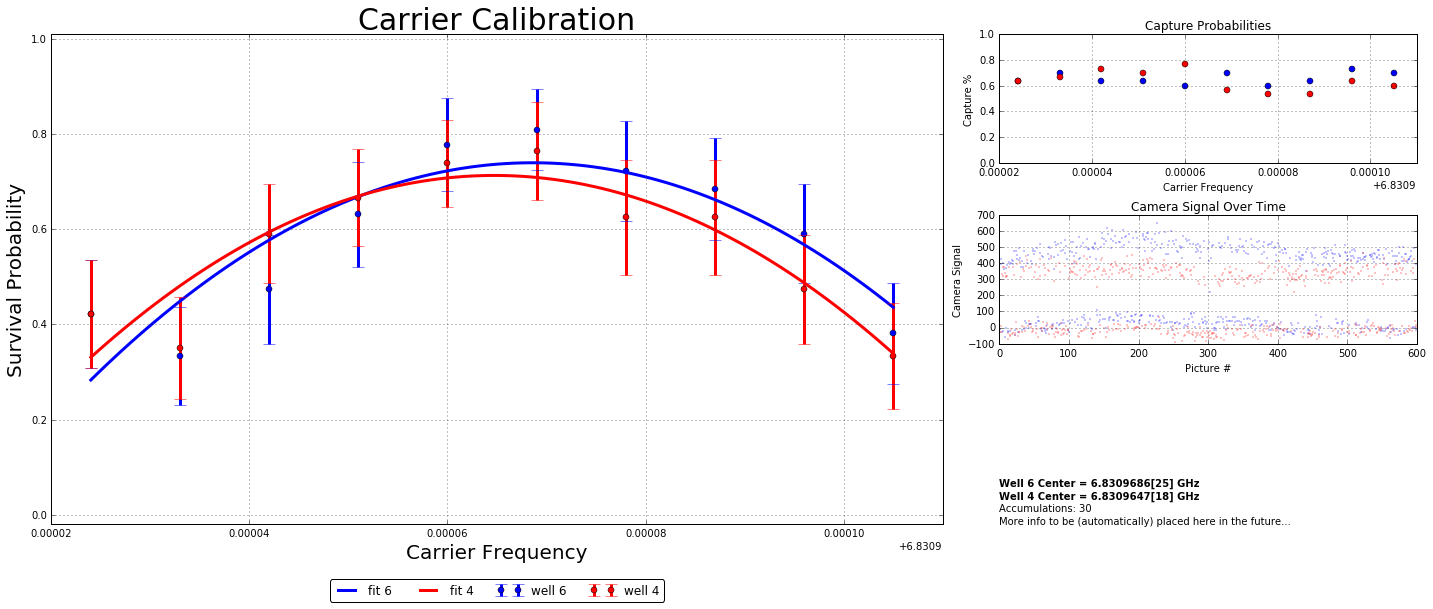

In [149]:
# DATA ANALYSIS
well6Address = directory + filename + "_well62.tsv"
well4Address = directory + filename + "_well42.tsv"
content6 = [line.rstrip('\n') for line in open(well6Address)]
content4 = [line.rstrip('\n') for line in open(well4Address)]
# Get the key.
key = list(map(float, content6[2].split('\t')))
# Get capture data
capture6 = list(map(float,content6[4].split(' ')[0:len(content6[4].split(' ')) - 1]))
capture4 = list(map(float,content4[4].split(' ')[0:len(content4[4].split(' ')) - 1]))
# Get All Pixel Count Data of locations of interest.
count6 = list(map(float,content6[1].split('\t')[0:len(content6[1].split('\t')) - 1]))
count4 = list(map(float,content4[1].split('\t')[0:len(content4[1].split('\t')) - 1]))
# get the data points.
data6Str = content6[3].split('\t')
data4Str = content4[3].split('\t')
data6 = [];
data4 = [];
for ind in data6Str:
    data6.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
for ind in data4Str:
    data4.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
keyFromData6 = list(list(zip(*data6))[0]);
dataPoints6 = list(list(zip(*data6))[1]);
error6 = list(list(zip(*data6))[2]);
keyFromData4 = list(list(zip(*data4))[0]);
dataPoints4 = list(list(zip(*data4))[1]);
error4 = list(list(zip(*data4))[2]);
# fit
xData = np.linspace(min(keyFromData6), max(keyFromData6),100)
fitValues6, covValues6 = fit(quadratic, keyFromData6, dataPoints6, p0=[1,-5*10**8,6.83096])
fit6Data = quadratic(xData, *fitValues6);
fitValues4, covValues4 = fit(quadratic, keyFromData4, dataPoints4, p0=[1,-5*10**8,6.83096])
fit4Data = quadratic(xData, *fitValues4)
# Carrier Plot
myFig = plt.figure(1, facecolor="white", figsize=(20, 8))
mainPlot = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
mainPlot.errorbar(keyFromData6, dataPoints6, yerr=error6, ls='', marker='o', label="well 6", color='b', capsize=6,
                  elinewidth=3)
mainPlot.plot(xData, fit6Data, color='b', label='fit 6', linewidth=3)
mainPlot.errorbar(keyFromData4, dataPoints4, yerr=error4, ls='', marker='o', label="well 4", color='r', capsize=6, 
                  elinewidth=3)
mainPlot.plot(xData, fit4Data, color='r', label='fit 4', linewidth=3)
mainPlot.set_ylim({-0.02, 1.01});
mainPlot.set_title("Carrier Calibration", fontsize=30);
mainPlot.set_ylabel("Survival Probability", fontsize=20);
mainPlot.set_xlabel("Carrier Frequency", fontsize=20);
mainPlot.legend(loc="upper center", bbox_to_anchor=(0.5,-0.1), fancybox=True, ncol=4);
mainPlot.grid("on")
# Capture Probabilities Plot
capturePlot = plt.subplot2grid((3,3), (0,2))
capturePlot.plot(key, capture6, ls='', marker='o', color='b')
capturePlot.plot(key, capture4, ls='', marker='o', color='r')
capturePlot.set_ylim({0,1})
capturePlot.set_xlabel("Carrier Frequency")
capturePlot.set_ylabel("Capture %")
capturePlot.set_title("Capture Probabilities")
capturePlot.grid("on")
# Count Series Plot
countDataPlot = plt.subplot2grid((3,3), (1,2))
countDataPlot.plot(count6,'b', ls='', marker='.', markersize=1)
countDataPlot.plot(count4,'r', ls='', marker='.', markersize=1)
countDataPlot.set_xlabel("Picture #")
countDataPlot.set_ylabel("Camera Signal")
countDataPlot.set_title("Camera Signal Over Time")
countDataPlot.grid("on")
# info plot
infoPlot = plt.subplot2grid((3,3), (2,2))
infoPlot.axis("off")
infoPlot.text(0,0, "More info to be (automatically) placed here in the future...")
infoPlot.text(0,0.1,"Accumulations: " + str(content6[0]))
infoPlot.text(0,0.2,"Well 4 Center = " + "{:.7f}".format(fitValues4[2]) + "[" 
              + "{:.0f}".format(10**7*np.sqrt(covValues4[2][2])) + "] GHz", fontweight='bold')
infoPlot.text(0,0.3,"Well 6 Center = " + "{:.7f}".format(fitValues6[2]) + "[" 
              + "{:.0f}".format(10**7*np.sqrt(covValues6[2][2])) + "] GHz", fontweight='bold');
plt.tight_layout()

## #???. Sideband Spectrum (Axial)

**Notes:**  
**Outcome:** 

In [47]:
filename = "Sideband_Spectrum_Axial_Vert_run4"

C:\Users\Mark\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


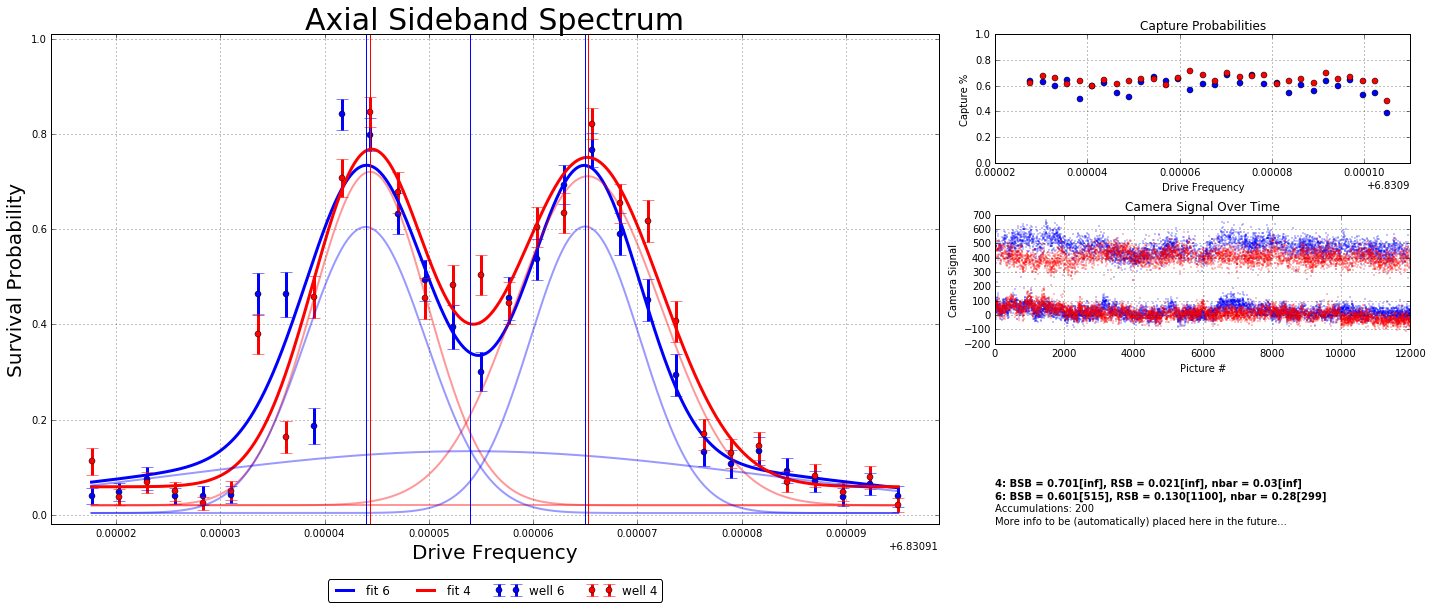

In [71]:
# DATA ANALYSIS
well6Address = directory + filename + "_well62.tsv"
well4Address = directory + filename + "_well42.tsv"
content6 = [line.rstrip('\n') for line in open(well6Address)]
content4 = [line.rstrip('\n') for line in open(well4Address)]
# Get the key.
key = list(map(float, content6[2].split('\t')))
# Get capture data
capture6 = list(map(float,content6[4].split(' ')[0:len(content6[4].split(' ')) - 1]))
capture4 = list(map(float,content4[4].split(' ')[0:len(content4[4].split(' ')) - 1]))
# Get All Pixel Count Data of locations of interest.
count6 = list(map(float,content6[1].split('\t')[0:len(content6[1].split('\t')) - 1]))
count4 = list(map(float,content4[1].split('\t')[0:len(content4[1].split('\t')) - 1]))
# get the data points.
data6Str = content6[3].split('\t')
data4Str = content4[3].split('\t')
data6 = [];
data4 = [];
for ind in data6Str:
    data6.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
for ind in data4Str:
    data4.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
keyFromData6 = list(list(zip(*data6))[0]);
dataPoints6 = list(list(zip(*data6))[1]);
error6 = list(list(zip(*data6))[2]);
keyFromData4 = list(list(zip(*data4))[0]);
dataPoints4 = list(list(zip(*data4))[1]);
error4 = list(list(zip(*data4))[2]);

# fit
xData = np.linspace(min(keyFromData6), max(keyFromData6),1000)
fitValues6, covValues6 = fit(tripleGaussian, keyFromData6, dataPoints6, p0=[0.8,6.830945, 1*10**(-5),0.8, 6.830975, 
                                                                            1*10**(-5), 0.05, 6.83099, 1*10**(-5), 
                                                                            0.1])
fit6Data = tripleGaussian(xData, *fitValues6);
# Divide by 3 because the offset is shared between all three gaussians.
rsbFit6Data = gaussian(xData, fitValues6[0], fitValues6[1], fitValues6[2], fitValues6[9]/3)
carrierFit6Data = gaussian(xData, fitValues6[3], fitValues6[4], fitValues6[5], fitValues6[9]/3)
bsbFit6Data = gaussian(xData, fitValues6[6], fitValues6[7], fitValues6[8], fitValues6[9]/3)
fitValues4, covValues4 = fit(tripleGaussian, keyFromData4, dataPoints4, p0=[0.8,6.83095, 2*10**(-5),0.8, 6.830975, 
                                                                            2*10**(-5), 0.05, 6.83099, 2*10**(-5), 
                                                                            0.1])
fit4Data = tripleGaussian(xData, *fitValues4)
rsbFit4Data = gaussian(xData, fitValues4[0], fitValues4[1], fitValues4[2], fitValues4[9]/3)
carrierFit4Data = gaussian(xData, fitValues4[3], fitValues4[4], fitValues4[5], fitValues4[9]/3)
bsbFit4Data = gaussian(xData, fitValues4[6], fitValues4[7], fitValues4[8], fitValues4[9]/3)
# Sideband Plot
myFig = plt.figure(1, facecolor="white", figsize=(20, 8))

mainPlot = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
mainPlot.errorbar(keyFromData6, dataPoints6, yerr=error6, ls='', marker='o', label="well 6", color='b', capsize=6,
                  elinewidth=3)
mainPlot.plot(xData, fit6Data, color='b', label='fit 6', linewidth=3)
mainPlot.errorbar(keyFromData4, dataPoints4, yerr=error4, ls='', marker='o', label="well 4", color='r', capsize=6, 
                  elinewidth=3)
mainPlot.plot(xData, fit4Data, color='r', label='fit 4', linewidth=3)
mainPlot.plot(xData, rsbFit4Data, color='r', alpha=0.4, linewidth=2)
mainPlot.plot(xData, carrierFit4Data, color='r', alpha=0.4, linewidth=2)
mainPlot.plot(xData, bsbFit4Data, color='r', alpha=0.4, linewidth=2)
mainPlot.plot(xData, rsbFit6Data, color='b', alpha=0.4, linewidth=2)
mainPlot.plot(xData, carrierFit6Data, color='b', alpha=0.4, linewidth=2)
mainPlot.plot(xData, bsbFit6Data, color='b', alpha=0.4, linewidth=2)
mainPlot.axvline(fitValues4[1], color='r')
mainPlot.axvline(fitValues4[4], color='r')
mainPlot.axvline(fitValues4[7], color='r')
mainPlot.axvline(fitValues6[1], color='b')
mainPlot.axvline(fitValues6[4], color='b')
mainPlot.axvline(fitValues6[7], color='b')
#mainPlot.axhline(6.83096)
mainPlot.set_ylim({-0.02, 1.01});
dataRange = max(key)-min(key)
#print(max(key) + dataRange*0.05)
#print(min(key) - dataRange*0.05)
mainPlot.set_xlim({max(key) + dataRange*0.05,min(key) - dataRange*0.05})
mainPlot.set_title("Axial Sideband Spectrum", fontsize=30);
mainPlot.set_ylabel("Survival Probability", fontsize=20);
mainPlot.set_xlabel("Drive Frequency", fontsize=20);
mainPlot.legend(loc="upper center", bbox_to_anchor=(0.5,-0.1), fancybox=True, ncol=4);
mainPlot.grid("on")
# Capture Probabilities Plot
capturePlot = plt.subplot2grid((3,3), (0,2))
capturePlot.plot(key, capture6, ls='', marker='o', color='b')
capturePlot.plot(key, capture4, ls='', marker='o', color='r')
capturePlot.set_ylim({0,1})
capturePlot.set_xlabel("Drive Frequency")
capturePlot.set_ylabel("Capture %")
capturePlot.set_title("Capture Probabilities")
capturePlot.grid("on")
# Count Series Plot
countDataPlot = plt.subplot2grid((3,3), (1,2))
countDataPlot.plot(count6,'b', ls='', marker='.', markersize=1)
countDataPlot.plot(count4,'r', ls='', marker='.', markersize=1)
countDataPlot.set_xlabel("Picture #")
countDataPlot.set_ylabel("Camera Signal")
countDataPlot.set_title("Camera Signal Over Time")
countDataPlot.grid("on")
# info plot
infoPlot = plt.subplot2grid((3,3), (2,2))
infoPlot.axis("off")
infoPlot.text(0,0, "More info to be (automatically) placed here in the future...")
infoPlot.text(0,0.1,"Accumulations: " + str(content6[0]))
# calculate nbar.
bsb4 = fitValues4[0];
bsb4Sig = np.sqrt(covValues4[0][0]);
rsb4 = fitValues4[6];
rsb4Sig = np.sqrt(covValues4[6][6]);
r4 = rsb4/bsb4
r4Sig = r4 * np.sqrt(bsb4Sig**2/bsb4**2 + rsb4Sig**2/rsb4**2)
nbar4 = r4/(1-r4)
nbar4Sig = 1/(1-r4)**2 * r4Sig

bsb6 = fitValues6[0];
bsb6Sig = np.sqrt(covValues6[0][0]);
rsb6 = fitValues6[6];
rsb6Sig = np.sqrt(covValues6[6][6]);
r6 = rsb6/bsb6
r6Sig = r6 * np.sqrt(bsb6Sig**2/bsb6**2 + rsb6Sig**2/rsb6**2)
nbar6 = r6/(1-r6)
nbar6Sig = 1/(1-r6)**2 * r6Sig

infoPlot.text(0,0.3,"4: BSB = " + "{:.3f}".format(bsb4) + "[" 
              + "{:.0f}".format(10**3*bsb4Sig) + "], RSB = " + "{:.3f}".format(rsb4) + "[" 
              + "{:.0f}".format(10**3*rsb4Sig) + "], nbar = " + "{:.2f}".format(nbar4) + "[" 
              + "{:.0f}".format(10**2*nbar4Sig) + "]", fontweight='bold')
infoPlot.text(0,0.2,"6: BSB = " + "{:.3f}".format(bsb6) + "[" 
              + "{:.0f}".format(10**3*bsb6Sig) + "], RSB = " + "{:.3f}".format(rsb6) + "[" 
              + "{:.0f}".format(10**3*rsb6Sig) + "], nbar = " + "{:.2f}".format(nbar6) + "[" 
              + "{:.0f}".format(10**2*nbar6Sig) + "]", fontweight='bold')
plt.tight_layout()

## #???. Sideband Spectrum (Top or Bottom)

**Notes:**  
**Outcome:** 

In [40]:
#filename = "Sideband_Spectrum_Axial_Vert_run4"
filename = "Sideband_Spectrum_Bottom_Vert_run4"
# DATA ANALYSIS
well6Address = directory + filename + "_well62.tsv"
well4Address = directory + filename + "_well42.tsv"
content6 = [line.rstrip('\n') for line in open(well6Address)]
content4 = [line.rstrip('\n') for line in open(well4Address)]
# Get the key.
key = list(map(float, content6[2].split('\t')))
# Get capture data
capture6 = list(map(float,content6[4].split(' ')[0:len(content6[4].split(' ')) - 1]))
capture4 = list(map(float,content4[4].split(' ')[0:len(content4[4].split(' ')) - 1]))
# Get All Pixel Count Data of locations of interest.
count6 = list(map(float,content6[1].split('\t')[0:len(content6[1].split('\t')) - 1]))
count4 = list(map(float,content4[1].split('\t')[0:len(content4[1].split('\t')) - 1]))
# get the data points.
data6Str = content6[3].split('\t')
data4Str = content4[3].split('\t')
data6 = [];
data4 = [];
for ind in data6Str:
    data6.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
for ind in data4Str:
    data4.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
keyFromData6 = list(list(zip(*data6))[0]);
dataPoints6 = list(list(zip(*data6))[1]);
error6 = list(list(zip(*data6))[2]);
keyFromData4 = list(list(zip(*data4))[0]);
dataPoints4 = list(list(zip(*data4))[1]);
error4 = list(list(zip(*data4))[2]);
# fit
xData = np.linspace(min(keyFromData6), max(keyFromData6),1000)
fitValues6, covValues6 = fit(doubleGaussian, keyFromData6, dataPoints6, p0=[0.8,6.8308, 2*10**(-5),0.8, 6.8311, 
                                                                            2*10**(-5), 0.1])
fit6Data = doubleGaussian(xData, *fitValues6);
fitValues4, covValues4 = fit(doubleGaussian, keyFromData4, dataPoints4, p0=[0.8,6.8308, 2*10**(-5),0.05, 6.8311, 
                                                                            2*10**(-5), 0.1])

fit4Data = doubleGaussian(xData, *fitValues4)
# Sideband Plot
myFig = plt.figure(1, facecolor="white", figsize=(20, 8))

mainPlot = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
mainPlot.errorbar(keyFromData6, dataPoints6, yerr=error6, ls='', marker='o', label="well 6", color='b', capsize=6,
                  elinewidth=3, alpha=0.8)
mainPlot.plot(xData, fit6Data, color='b', label='fit 6', linewidth=3)
mainPlot.errorbar(keyFromData4, dataPoints4, yerr=error4, ls='', marker='o', label="well 4", color='r', capsize=6, 
                  elinewidth=3, alpha=0.8)
mainPlot.plot(xData, fit4Data, color='r', label='fit 4', linewidth=3)
mainPlot.axvline(fitValues4[1], color='r')
mainPlot.axvline(fitValues4[4], color='r')
mainPlot.axvline(fitValues6[1], color='b')
mainPlot.axvline(fitValues6[4], color='b')
#mainPlot.axhline(6.83096)
mainPlot.set_ylim({-0.02, 1.01});
dataRange = max(key)-min(key)
mainPlot.set_xlim({min(key) - dataRange*0.05, max(key) + dataRange*0.05})
mainPlot.set_title("Axial Sideband Spectrum", fontsize=30);
mainPlot.set_ylabel("Survival Probability", fontsize=20);
mainPlot.set_xlabel("Drive Frequency", fontsize=20);
mainPlot.legend(loc="upper center", bbox_to_anchor=(0.5,-0.1), fancybox=True, ncol=4);
mainPlot.grid("on")
# Capture Probabilities Plot
capturePlot = plt.subplot2grid((3,3), (0,2))
capturePlot.plot(key, capture6, ls='', marker='o', color='b')
capturePlot.plot(key, capture4, ls='', marker='o', color='r')
capturePlot.set_ylim({0,1})
capturePlot.set_xlabel("Drive Frequency")
capturePlot.set_ylabel("Capture %")
capturePlot.set_title("Capture Probabilities")
capturePlot.grid("on")
# Count Series Plot
countDataPlot = plt.subplot2grid((3,3), (1,2))
countDataPlot.plot(count6,'b', ls='', marker='.', markersize=1)
countDataPlot.plot(count4,'r', ls='', marker='.', markersize=1)
countDataPlot.set_xlabel("Picture #")
countDataPlot.set_ylabel("Camera Signal")
countDataPlot.set_title("Camera Signal Over Time")
countDataPlot.grid("on")
# info plot
infoPlot = plt.subplot2grid((3,3), (2,2))
infoPlot.axis("off")
infoPlot.text(0,0, "More info to be (automatically) placed here in the future...")
infoPlot.text(0,0.1,"Accumulations: " + str(content6[0]))
# calculate nbar.
bsb4 = fitValues4[0];
bsb4Sig = np.sqrt(covValues4[0][0]);
rsb4 = fitValues4[3];
rsb4Sig = np.sqrt(covValues4[3][3]);
r4 = rsb4/bsb4
r4Sig = r4 * np.sqrt(bsb4Sig**2/bsb4**2 + rsb4Sig**2/rsb4**2)
nbar4 = r4/(1-r4)
nbar4Sig = 1/(1-r4)**2 * r4Sig

bsb6 = fitValues6[0];
bsb6Sig = np.sqrt(covValues6[0][0]);
rsb6 = fitValues6[3];
rsb6Sig = np.sqrt(covValues6[3][3]);
r6 = rsb6/bsb6
r6Sig = r6 * np.sqrt(bsb6Sig**2/bsb6**2 + rsb6Sig**2/rsb6**2)
nbar6 = r6/(1-r6)
nbar6Sig = 1/(1-r6)**2 * r6Sig

infoPlot.text(0,0.3,"4: BSB = " + "{:.3f}".format(bsb4) + "[" 
              + "{:.0f}".format(10**3*bsb4Sig) + "], RSB = " + "{:.3f}".format(rsb4) + "[" 
              + "{:.0f}".format(10**3*rsb4Sig) + "], nbar = " + "{:.2f}".format(nbar4) + "[" 
              + "{:.0f}".format(10**2*nbar4Sig) + "]", fontweight='bold')
infoPlot.text(0,0.2,"6: BSB = " + "{:.3f}".format(bsb6) + "[" 
              + "{:.0f}".format(10**3*bsb6Sig) + "], RSB = " + "{:.3f}".format(rsb6) + "[" 
              + "{:.0f}".format(10**3*rsb6Sig) + "], nbar = " + "{:.2f}".format(nbar6) + "[" 
              + "{:.0f}".format(10**2*nbar6Sig) + "]", fontweight='bold')
plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: '//Andor/share/Data and documents/Data repository/160807/Sideband_Spectrum_Bottom_Vert_run4_well62.tsv'

## #???. Tunneling Bias Scan

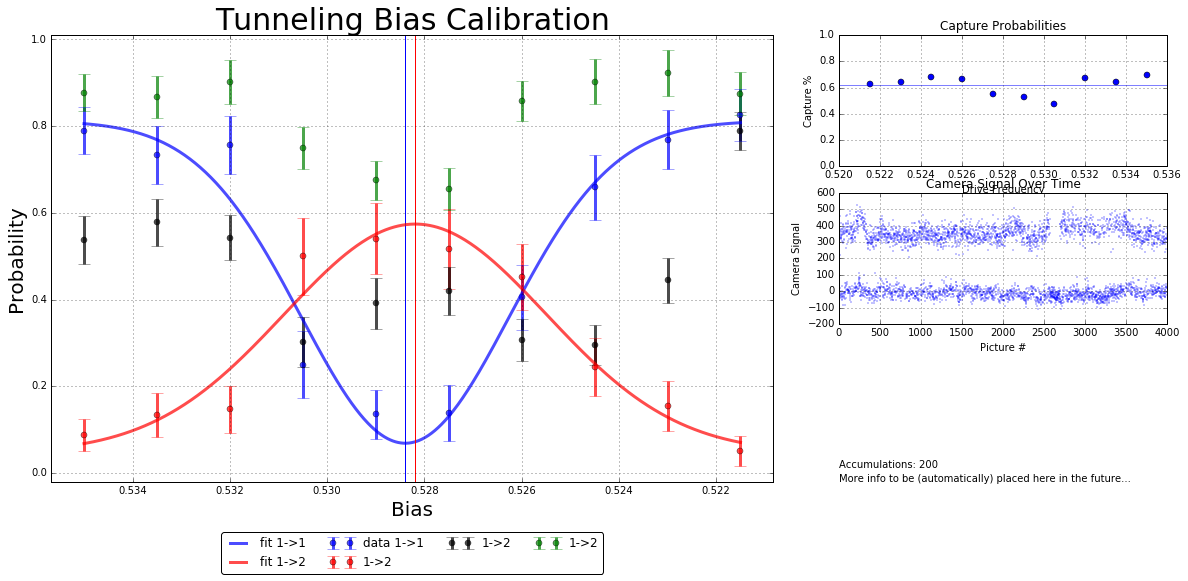

In [65]:
# filename
filename = "Tunneling_Bias_Scan_Vert_run5"
# open file
address = directory + filename + "_pair(6,2), (6,2).tsv"
content = [line.rstrip('\n') for line in open(address)]
# get counts
counts = list(map(float,content[1].split('\t')[0:len(content[1].split('\t')) - 1]))
# get capture data.
captures = list(map(float,content[4].split(' ')[0:len(content[4].split(' ')) - 1]))
#
tunnel_1to1_DataStr = content[3].split('\t')
tunnel_1to2_DataStr = content[6].split('\t')
tunnel_BothToBoth_DataStr = content[7].split('\t')
tunnel_1to1_Data = []
tunnel_1to2_Data = []
tunnel_BothToBoth_Data = []
for ind in tunnel_1to1_DataStr:
    tunnel_1to1_Data.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
for ind in tunnel_1to2_DataStr:
    tunnel_1to2_Data.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
for ind in tunnel_BothToBoth_DataStr:
    tunnel_BothToBoth_Data.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
key = list(list(zip(*tunnel_1to1_Data))[0]);
dataPoints_1to1 = np.array(list(list(zip(*tunnel_1to1_Data))[1]));
error_1to1 = np.array(list(list(zip(*tunnel_1to1_Data))[2]));
dataPoints_1to2 = np.array(list(list(zip(*tunnel_1to2_Data))[1]));
error_1to2 = np.array(list(list(zip(*tunnel_1to2_Data))[2]));
dataPoints_1Survival = dataPoints_1to1 + dataPoints_1to2;
error_1Survival = np.sqrt((dataPoints_1to1*error_1to1)**2 + (dataPoints_1to2*error_1to2)**2)
dataPoints_BothToBoth = list(list(zip(*tunnel_BothToBoth_Data))[1]);
error_BothToBoth = list(list(zip(*tunnel_BothToBoth_Data))[2]);
fit_1to1, cov_1to1 = fit(gaussian, key, dataPoints_1to1, p0 = [-0.7, 0.528, 0.001, 1])
fit_1to2, cov_1to2 = fit(gaussian, key, dataPoints_1to2,  p0 = [0.7, 0.528, 0.001, 0])
xData = np.linspace(min(key), max(key), 1000)
fit_1to1_data = gaussian(xData, *fit_1to1)
fit_1to2_data = gaussian(xData, *fit_1to2)

"""
fit_1to1, cov_1to1 = fit(decayingCos, key, dataPoints_1to1, p0 = [0.4, -10, 10, np.pi/2, 0.5])
fit_1to2, cov_1to2 = fit(decayingCos, key, dataPoints_1to2,  p0 = [0.4, -10, 10, 3*np.pi/2, 0.5])
def decayingCos(x, A, tau, f, phi, offset):
    if (A < 0):
        return 10**10
    if (phi < 0):
        return 10**10
    if (offset < 0):
        return 10**10
    if (tau > 0):
        return 10**10
    return offset + A * np.exp(-x/tau) * np.cos(2 * np.pi * f * x + phi)
"""

myFig = plt.figure(1, facecolor="white", figsize=(20, 8))
# Bias Plot
mainPlot = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
mainPlot.errorbar(key, dataPoints_1to1, yerr=error_1to1, ls='', marker='o', label="data 1->1", color='b',
                  capsize=6, elinewidth=3, alpha=0.7)
mainPlot.plot(xData, fit_1to1_data, color='b', label='fit 1->1', linewidth=3, alpha=0.7)
mainPlot.axvline(fit_1to1[1], color='b')
mainPlot.errorbar(key, dataPoints_1to2, yerr=error_1to2, ls='', marker='o', label="1->2", color='r',
                  capsize=6, elinewidth=3, alpha=0.7)
mainPlot.errorbar(key, dataPoints_BothToBoth, yerr=error_BothToBoth, ls='', marker='o', label="1->2", color='k',
                  capsize=6, elinewidth=3, alpha=0.7)
mainPlot.errorbar(key, dataPoints_1Survival, yerr=error_1Survival, ls='', marker='o', label="1->2", color='g',
                  capsize=6, elinewidth=3, alpha=0.7)
mainPlot.plot(xData, fit_1to2_data, color='r', label='fit 1->2', linewidth=3, alpha=0.7)
mainPlot.axvline(fit_1to2[1], color='r')
mainPlot.set_ylim({-0.02, 1.01});
dataRange = max(key)-min(key)
mainPlot.set_xlim({min(key) - dataRange*0.05, max(key) + dataRange*0.05})
mainPlot.set_title("Tunneling Bias Calibration", fontsize=30);
mainPlot.set_ylabel("Probability", fontsize=20);
mainPlot.set_xlabel("Bias", fontsize=20);
mainPlot.legend(loc="upper center", bbox_to_anchor=(0.5,-0.1), fancybox=True, ncol=4);
mainPlot.grid("on")
# Capture Probabilities Plot
capturePlot = plt.subplot2grid((3,3), (0,2))
capturePlot.plot(key, captures, ls='', marker='o', color='b')
capturePlot.axhline(float(sum(captures) / len(captures)), alpha = 0.5, color='b')
capturePlot.set_ylim({0,1})
capturePlot.set_xlabel("Drive Frequency")
capturePlot.set_ylabel("Capture %")
capturePlot.set_title("Capture Probabilities")
capturePlot.grid("on")
# Count Series Plot
countDataPlot = plt.subplot2grid((3,3), (1,2))
countDataPlot.plot(counts,'b', ls='', marker='.', markersize=1)
countDataPlot.set_xlabel("Picture #")
countDataPlot.set_ylabel("Camera Signal")
countDataPlot.set_title("Camera Signal Over Time")
countDataPlot.grid("on")
# info plot
infoPlot = plt.subplot2grid((3,3), (2,2))
infoPlot.axis("off")
infoPlot.text(0,0, "More info to be (automatically) placed here in the future...")
infoPlot.text(0,0.1,"Accumulations: " + str(content[0]));

## #???. Tunneling Time Scan

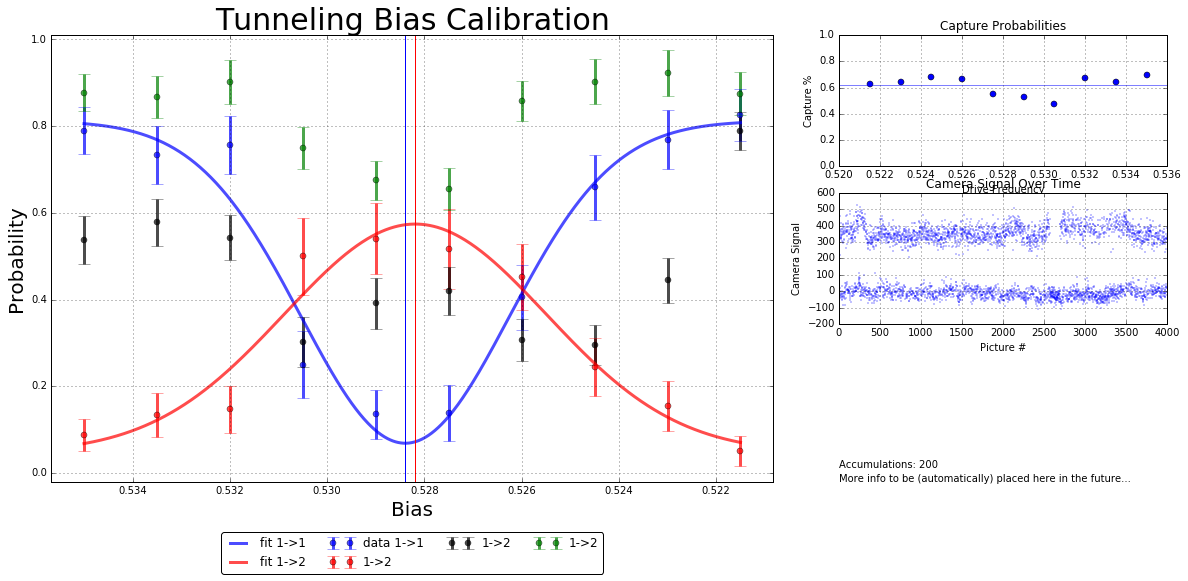

In [65]:
# filename
filename = "Tunneling_Time_Scan_Vert_run5"
# open file
address = directory + filename + "_pair(6,2), (6,2).tsv"
content = [line.rstrip('\n') for line in open(address)]
# get counts
counts = list(map(float,content[1].split('\t')[0:len(content[1].split('\t')) - 1]))
# get capture data.
captures = list(map(float,content[4].split(' ')[0:len(content[4].split(' ')) - 1]))
#
tunnel_1to1_DataStr = content[3].split('\t')
tunnel_1to2_DataStr = content[6].split('\t')
tunnel_BothToBoth_DataStr = content[7].split('\t')
tunnel_1to1_Data = []
tunnel_1to2_Data = []
tunnel_BothToBoth_Data = []
for ind in tunnel_1to1_DataStr:
    tunnel_1to1_Data.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
for ind in tunnel_1to2_DataStr:
    tunnel_1to2_Data.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
for ind in tunnel_BothToBoth_DataStr:
    tunnel_BothToBoth_Data.append(list(map(float,
        (ind.replace('{','').replace('ErrorBar[','').replace(']','').replace('}','').replace(' ','')).split(','))))
key = list(list(zip(*tunnel_1to1_Data))[0]);
dataPoints_1to1 = np.array(list(list(zip(*tunnel_1to1_Data))[1]));
error_1to1 = np.array(list(list(zip(*tunnel_1to1_Data))[2]));
dataPoints_1to2 = np.array(list(list(zip(*tunnel_1to2_Data))[1]));
error_1to2 = np.array(list(list(zip(*tunnel_1to2_Data))[2]));
dataPoints_1Survival = dataPoints_1to1 + dataPoints_1to2;
error_1Survival = np.sqrt((dataPoints_1to1*error_1to1)**2 + (dataPoints_1to2*error_1to2)**2)
dataPoints_BothToBoth = list(list(zip(*tunnel_BothToBoth_Data))[1]);
error_BothToBoth = list(list(zip(*tunnel_BothToBoth_Data))[2]);
fit_1to1, cov_1to1 = fit(gaussian, key, dataPoints_1to1, p0 = [-0.7, 0.528, 0.001, 1])
fit_1to2, cov_1to2 = fit(gaussian, key, dataPoints_1to2,  p0 = [0.7, 0.528, 0.001, 0])
xData = np.linspace(min(key), max(key), 1000)
fit_1to1_data = gaussian(xData, *fit_1to1)
fit_1to2_data = gaussian(xData, *fit_1to2)

"""
fit_1to1, cov_1to1 = fit(decayingCos, key, dataPoints_1to1, p0 = [0.4, -10, 10, np.pi/2, 0.5])
fit_1to2, cov_1to2 = fit(decayingCos, key, dataPoints_1to2,  p0 = [0.4, -10, 10, 3*np.pi/2, 0.5])
def decayingCos(x, A, tau, f, phi, offset):
    if (A < 0):
        return 10**10
    if (phi < 0):
        return 10**10
    if (offset < 0):
        return 10**10
    if (tau > 0):
        return 10**10
    return offset + A * np.exp(-x/tau) * np.cos(2 * np.pi * f * x + phi)
"""

myFig = plt.figure(1, facecolor="white", figsize=(20, 8))
# Bias Plot
mainPlot = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
mainPlot.errorbar(key, dataPoints_1to1, yerr=error_1to1, ls='', marker='o', label="data 1->1", color='b',
                  capsize=6, elinewidth=3, alpha=0.7)
mainPlot.plot(xData, fit_1to1_data, color='b', label='fit 1->1', linewidth=3, alpha=0.7)
mainPlot.axvline(fit_1to1[1], color='b')
mainPlot.errorbar(key, dataPoints_1to2, yerr=error_1to2, ls='', marker='o', label="1->2", color='r',
                  capsize=6, elinewidth=3, alpha=0.7)
mainPlot.errorbar(key, dataPoints_BothToBoth, yerr=error_BothToBoth, ls='', marker='o', label="1->2", color='k',
                  capsize=6, elinewidth=3, alpha=0.7)
mainPlot.errorbar(key, dataPoints_1Survival, yerr=error_1Survival, ls='', marker='o', label="1->2", color='g',
                  capsize=6, elinewidth=3, alpha=0.7)
mainPlot.plot(xData, fit_1to2_data, color='r', label='fit 1->2', linewidth=3, alpha=0.7)
mainPlot.axvline(fit_1to2[1], color='r')
mainPlot.set_ylim({-0.02, 1.01});
dataRange = max(key)-min(key)
mainPlot.set_xlim({min(key) - dataRange*0.05, max(key) + dataRange*0.05})
mainPlot.set_title("Tunneling Bias Calibration", fontsize=30);
mainPlot.set_ylabel("Probability", fontsize=20);
mainPlot.set_xlabel("Bias", fontsize=20);
mainPlot.legend(loc="upper center", bbox_to_anchor=(0.5,-0.1), fancybox=True, ncol=4);
mainPlot.grid("on")
# Capture Probabilities Plot
capturePlot = plt.subplot2grid((3,3), (0,2))
capturePlot.plot(key, captures, ls='', marker='o', color='b')
capturePlot.axhline(float(sum(captures) / len(captures)), alpha = 0.5, color='b')
capturePlot.set_ylim({0,1})
capturePlot.set_xlabel("Drive Frequency")
capturePlot.set_ylabel("Capture %")
capturePlot.set_title("Capture Probabilities")
capturePlot.grid("on")
# Count Series Plot
countDataPlot = plt.subplot2grid((3,3), (1,2))
countDataPlot.plot(counts,'b', ls='', marker='.', markersize=1)
countDataPlot.set_xlabel("Picture #")
countDataPlot.set_ylabel("Camera Signal")
countDataPlot.set_title("Camera Signal Over Time")
countDataPlot.grid("on")
# info plot
infoPlot = plt.subplot2grid((3,3), (2,2))
infoPlot.axis("off")
infoPlot.text(0,0, "More info to be (automatically) placed here in the future...")
infoPlot.text(0,0.1,"Accumulations: " + str(content[0]));